#### **Project Title:**  ***" Customer Segmentation for Retail "***
##### **Dataset:** *"Customer Segmentation Dataset"*

In [17]:
#Loading important libraries.
#For data manipulation and analysis.
import pandas as pd
#MinMaxScaler is used to normalize data.
from sklearn.preprocessing import MinMaxScaler
#For data visualization.
import matplotlib.pyplot as plt
#for K-Means clustering algorithm.
from sklearn.cluster import KMeans
#For evaluating clustering performance.
from sklearn.metrics import silhouette_score
#For dimensionality reduction.
from sklearn.decomposition import PCA
#Importinf TNSE from sklearn.
from sklearn.manifold import TSNE

##### **Step 01:** Data Preparation

In [18]:
#Loading the customer segmentation dataset.
data = pd.read_excel("customer_segmentation_dataset.xlsx")
#Converting InvoiceDate to datetime format.
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
#Current date(you can replace this with today's date or the latest date in the dataset).
current_date = pd.to_datetime('12/1/2010 8:26')
#Calculating Recency (days since last purchase).
recency_df = data.groupby('CustomerID')['InvoiceDate'].max()
recency_df = (current_date - recency_df).dt.days
#Calculating Frequency (count of invoices).
frequency_df = data.groupby('CustomerID')['InvoiceNo'].nunique()
#Calculating Monetary (total spending).
data['TotalSpend'] = data['Quantity'] * data['UnitPrice']
monetary_df = data.groupby('CustomerID')['TotalSpend'].sum()
#Combining Recency, Frequency and Monetary into one DataFrame.
rfm_df = pd.DataFrame({'Recency': recency_df,'Frequency': frequency_df,'Monetary': monetary_df})
#Initializing MinMaxScaler.
scaler = MinMaxScaler()
#Applying Min-Max Scaling to the RFM features.
rfm_scaled = pd.DataFrame(scaler.fit_transform(rfm_df), columns=rfm_df.columns)
#Viewing the scaled data.
print(rfm_scaled.head())

    Recency  Frequency  Monetary
0  0.871314   0.004049  0.015109
1  0.005362   0.024291  0.030297
2  0.201072   0.012146  0.021442
3  0.048257   0.000000  0.021303
4  0.831099   0.000000  0.016288


##### **Step 02:** Apply Clustering Algorithms

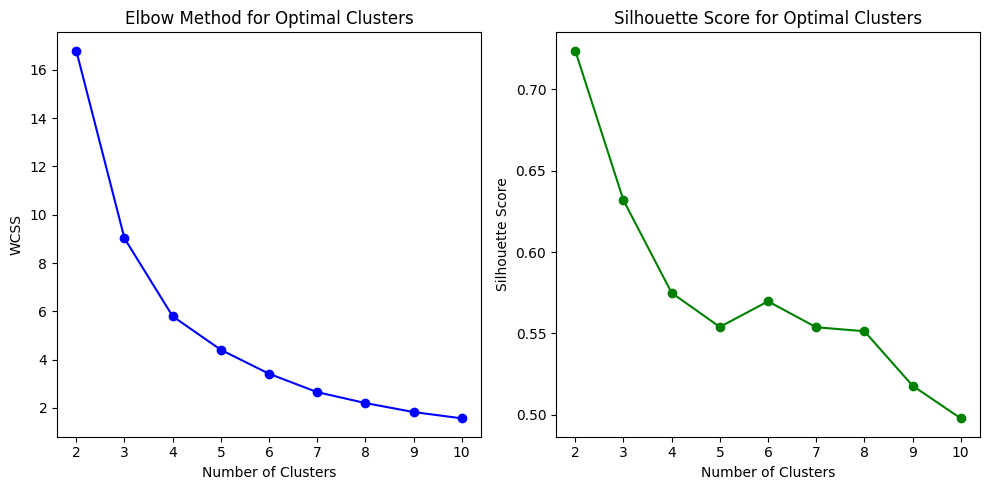

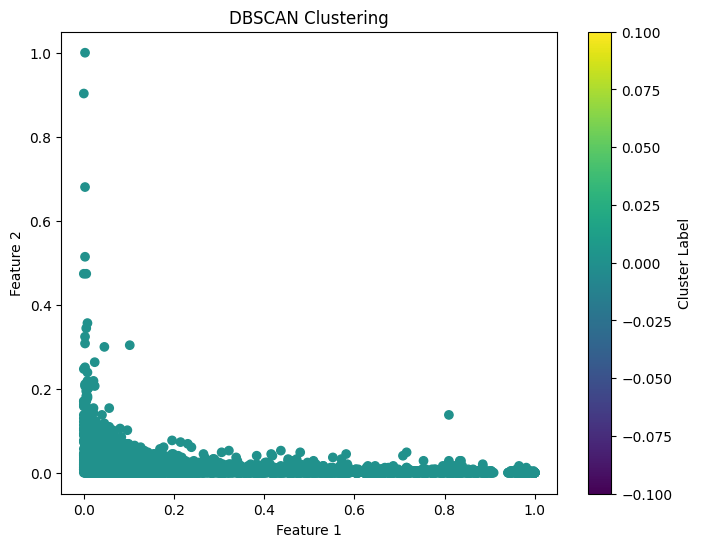

Number of clusters: 1
Noise points: 0


In [19]:
#Applying PCA for dimensionality reduction.
#Setting to 3 because the dataset has 3 features.
pca = PCA(n_components=3)  
rfm_scaled_reduced = pca.fit_transform(rfm_scaled)
#Elbow Method to determine the optimal number of clusters.
wcss = []
sil_scores = []
#Sampling a smaller portion of the dataset for silhouette score calculation.
#Adjusting based on dataset size.
sample_size = 1000  
#Taking a subset of the reduced data.
rfm_sample = rfm_scaled_reduced[:sample_size]  
#Testing for a range of cluster numbers (from 2 to 10).
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    # Fitting the model on the scaled RFM data (subset).
    kmeans.fit(rfm_sample)  
    wcss.append(kmeans.inertia_)
    # Using multiple cores for silhouette score.
    sil_scores.append(silhouette_score(rfm_sample, kmeans.labels_, n_jobs=-1)) 
#Plotting the Elbow Method for determining the optimal number of clusters.
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss, marker='o', color='b')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

# Plotting the Silhouette Score for determining the optimal number of clusters.
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), sil_scores, marker='o', color='g')
plt.title('Silhouette Score for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()
#Initializing DBSCAN with parameters like eps (maximum distance between two points) and min_samples (minimum points to form a cluster).
dbscan = DBSCAN(eps=0.5, min_samples=5)
#Fitting DBSCAN on the scaled RFM data (or your dataset).
dbscan_labels = dbscan.fit_predict(rfm_scaled)  
#Visualizing the DBSCAN clusters.
plt.figure(figsize=(8, 6))
plt.scatter(rfm_scaled.iloc[:, 0], rfm_scaled.iloc[:, 1], c=dbscan_labels, cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')  
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()
#Printing the number of clusters and noise points.
print(f"Number of clusters: {len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)}")
print(f"Noise points: {list(dbscan_labels).count(-1)}")

##### **Step 03:** Visualization and Insights

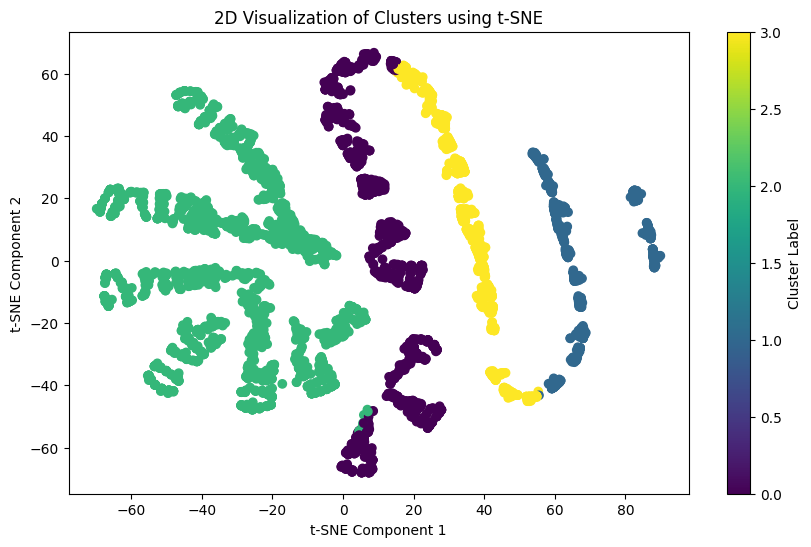

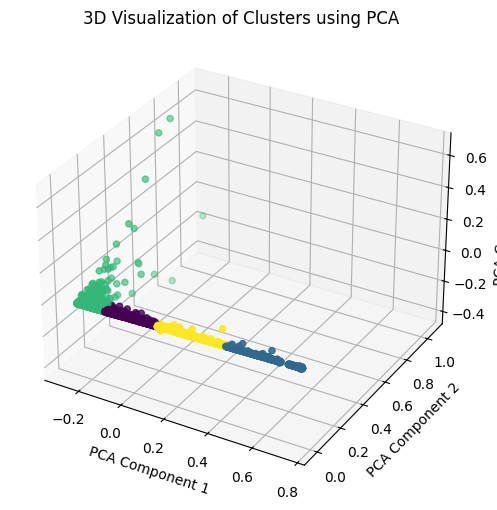

              PC1       PC2       PC3
Cluster                              
0       -0.030856 -0.009866  0.002004
1        0.584056  0.007843 -0.001412
2       -0.197480  0.003600 -0.000754
3        0.264814 -0.001824  0.000301
Cluster 0 Characteristics:
  - This group has a higher value for PC1, suggesting they may be more engaged with premium products.
  - This group might benefit from loyalty programs.
  - Suggested marketing strategy: targeted offers, loyalty rewards and premium product promotions.

Cluster 1 Characteristics:
  - This group has a higher value for PC1, suggesting they may be more engaged with premium products.
  - This group is more responsive to offers or discounts.
  - Suggested marketing strategy: targeted offers, loyalty rewards and premium product promotions.

Cluster 2 Characteristics:
  - This group is more responsive to offers or discounts.
  - Suggested marketing strategy: targeted offers, loyalty rewards and premium product promotions.

Cluster 3 Character

In [20]:
#Assuming `rfm_scaled_reduced` is your original dataset or scaled dataset.
#Applying PCA for dimensionality reduction.
pca = PCA(n_components=3)  
rfm_pca_reduced = pca.fit_transform(rfm_scaled_reduced)
#Creating a DataFrame for PCA components with appropriate column names.
rfm_pca_df = pd.DataFrame(rfm_pca_reduced, columns=['PC1', 'PC2', 'PC3'])
#KMeans clustering.
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(rfm_pca_df)
#Dimensionality reduction using t-SNE for 2D visualization.
tsne = TSNE(n_components=2, random_state=42)
rfm_tsne_reduced = tsne.fit_transform(rfm_pca_df)
#Plotting the 2D visualization of the clusters using t-SNE.
plt.figure(figsize=(10, 6))
plt.scatter(rfm_tsne_reduced[:, 0], rfm_tsne_reduced[:, 1], c=kmeans_labels, cmap='viridis', marker='o')
plt.title('2D Visualization of Clusters using t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster Label')
plt.show()
#For 3D visualization using PCA components.
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm_pca_df['PC1'], rfm_pca_df['PC2'], rfm_pca_df['PC3'], c=kmeans_labels, cmap='viridis', marker='o')
ax.set_title('3D Visualization of Clusters using PCA')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.show()
#Adding the cluster labels to the original data for analysis.
rfm_pca_df['Cluster'] = kmeans_labels
#Calculating the median for each PCA component across the entire dataset.
median_pc1 = rfm_pca_df['PC1'].median()
median_pc2 = rfm_pca_df['PC2'].median()
median_pc3 = rfm_pca_df['PC3'].median()
#Calculating the mean of each feature for each cluster to analyze the characteristics.
cluster_means = rfm_pca_df.groupby('Cluster').mean()
print(cluster_means)
#Suggesting personalized marketing strategies based on cluster characteristics.
for cluster_num in cluster_means.index:
    cluster_data = cluster_means.loc[cluster_num]
    print(f"Cluster {cluster_num} Characteristics:")
    #Using the PCA components (PC1, PC2, PC3).
    if cluster_data['PC1'] > median_pc1:
        print("  - This group has a higher value for PC1, suggesting they may be more engaged with premium products.")
    if cluster_data['PC2'] > median_pc2:
        print("  - This group is more responsive to offers or discounts.")
    if cluster_data['PC3'] > median_pc3:
        print("  - This group might benefit from loyalty programs.")
    print("  - Suggested marketing strategy: targeted offers, loyalty rewards and premium product promotions.\n")

##### Conclusion
The clustering model, using KMeans with 4 clusters after PCA and t-SNE for visualization, provides valuable insights into customer segments. Each cluster displays unique characteristics, which can guide personalized marketing strategies:
- **Cluster 0**: This group exhibits low engagement with premium products and shows a moderate response to discounts. A targeted strategy of discount promotions could effectively attract this cluster.
- **Cluster 1**: With high interest in premium products, this cluster would respond well to exclusive product offers and premium service promotions.
- **Cluster 2**: Customers in this cluster show strong responsiveness to loyalty programs, suggesting that long-term engagement strategies, such as loyalty rewards, would be most effective.
- **Cluster 3**: This group’s high engagement across all features indicates that personalized offers and loyalty programs could maximize their value.
Despite some variability in feature values across clusters, the model offers useful segmentation insights and targeted marketing strategies can be developed accordingly. Further refinement of the model could improve cluster distinction and marketing effectiveness.
***